# Latar Belakang
Airbnb adalah platform online yang memfasilitasi transaksi penginapan. Hal ini memungkinkan host untuk menyewakan properti atau kamar mereka kepada pelanggan. Airbnb menyediakan tempat bagi calon penyewa untuk membuat daftar, menemukan, dan memesan akomodasi unik di berbagai lokasi di seluruh dunia. Perusahaan mendapatkan pendapatan melalui biaya service terhadap transaki yang dilakukan di platform Airbnb, jumlah biaya service ditentukan dalam bentuk persentase dari jumlah biaya transaksi. Artinya, semakin banyak transaksi dan/atau semakin tinggi biaya transaksi akan semakin meningkatkan profitabilitas perusahaan.

## Pernyataan Masalah
Perusahaan Airbnb di Thailand ingin meningkatkan profit perusahaan. Karena profit Airbnb didapatkan dari persentase transaksi antara host dan penyewa properti, salah satu cara untuk meningkatkan tingkat profitabilitas Airbnb adalah dengan **meningkatkan nilai transaksi di antara host dan penyewa**, untuk menjawab hal tersebut sebagai seorang *data analyst*, saya akan mencoba menjawabnya dengan cara **mencari tahu faktor apa saja yang mempengaruhi nilai transaksi dari host** kemudian **menentukan actionable action yang bisa dilakukan berdasarkan finding dari analisa tersebut untuk meningkatkan profitabalitas dari Airbnb**. 


# Data
Untuk menjawab pertanyaan akan dilakukan analisa data listing Airbnb di Bangkok yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF). Dalam melakukan analisa data akan digunakan beberapa library Python pendukung untuk membantu melakukan eksplorasi data, cleaning data, analisa statistik, dan visualisasi. Beberapa library yang dipakai untuk analisa ini adalah Pandas, Numpy, Matplotlib, Seaborn, Plotly, Scipy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import kstest, shapiro, t, normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import folium
from folium.plugins import MarkerCluster


import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait properti yang disewakan seperti nama host, lokasi, review, biaya sewa. Ada 14 kolom di dalam dataset Airbnb_Listings_Bangkok, yaitu:  

* id: ID unik untuk tiap listing.
* name: Nama dari listing.
* host_id: Identifikasi unik untuk host.
* host_name: Nama host. Biasanya hanya nama pertama.
* neighborhood: Daerah sekitar di-geocode menggunakan latitude dan longitude terhadap daerah yang didefinisikan dengan Public Digital Shapefile.
* latitude: Menggunakan World Geodetic System (WGS84) projeksi untuk latitude.
* longitude: Menggunakan World Geodetic System (WGS84) projeksi untuk longitude.
* room_type: Tipe ruangan yang disewakan. DIbagi menjadi 3 tipe, entire place, private rooms, dan shared rooms.
* price: Harga harian dalam mata uang lokal. (Note: Tanda $  mungkin tetap digunakan meskipun sebenarnya mata uang lokal.)
* minimum_nights: Jumlah minimal untuk menginap pada listing tersebut.
* number_of_reviews: Jumlah review yang dimiliki oleh listing.
* reviews_per_month: Jumlah rata-rata review per bulan.
* last_review: Tanggal dari review terakhir untuk listing.
* calculated_host_listings_count: Jumlah listing yang saat ini dimiliki oleh host di kota saat ini.
* availability_365: Kalender menentukan ketersediaan listing x hari di masa depan. Perhatikan bahwa listing mungkin tersedia karena sudah dipesan oleh tamu atau diblokir oleh host.
* number_of_reviews_ltm: Jumlah review yang dimiliki oleh listing pada 12 bulan terakhir.


Berikut 5 baris teratas dan terbawah dari dataset Airbnb_Listings_Bangkok.

In [2]:
df=pd.read_csv('Airbnb_Listings_Bangkok.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Understanding & Data Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita yang selanjutnya perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi jumlah baris dan type setiap kolom dari dataset Airbnb_Listings_Bangkok.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15854 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

### Drop Columns
Sebelum melakukan eksplorasi lebih detail untuk mencari anomali dalam data, saya akan drop kolom yang tidak akan dipakai, agar nantinya tidak dilakukan double handling, misalnya melakukan cleaning pada data yang pada akhirnya tidak akan saya pakai. Karena pada analisa ini fokus saya adalah mencari faktor apa saja yang mempengaruhi nilai transaksi dari host, maka saya hanya akan memerlukan kolom yang memiliki pengaruh pada analisa tersebut, dan sisanya akan saya drop. Kolom yang akan didrop, yaitu:
* Unnamed: Kolom ini hanya berisikan nomor urutan, hanya akan menjadi data double karena sudah ada index.
* name: Kolom ini berisikan nama dari properti yang disewakan, tetapi jika dilihat lebih detail banyak dari data kolom name merupakan deskripsi dari properti yang disewakan tersebut, karena tidak konsisten maka saya drop. Selain itu, informasi mengenai antar property bisa saya dapatkan dari kolom 'id'
* last_review: Kolom ini tidak akan saya pakai, karena pada saat analisa nanti informasi dari kolom ini tidak relevan, karena saya tidak informasi mengenai waktu terakhir review akan saya dapatkan dari kolom 'number_of_reviews_ltm'.
* host_name: Kolom ini berisikan nama dari host/pemilik properti, tidak diperlukan karena data host sudah direpresntasikan oleh 'host_id'.
* calculated_host_listings_count: Kolom ini didrop karena kita tidak memerlukan data jumlah properti yang dimiliki tiap host.

In [4]:
df.drop(['Unnamed: 0','name','last_review', 'host_name', 'calculated_host_listings_count'], axis=1, inplace=True)

In [5]:
#check columns untuk memastikan columns sudah didrop sesuai langkah sebelumnya
df.columns

Index(['id', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'availability_365', 'number_of_reviews_ltm'],
      dtype='object')

### Check Duplicate

In [6]:
#check apakah terdapat data duplikat dalam dataframe
duplicateRows = df[df.duplicated()]
duplicateRows.sum()

#dari hasil check dengan code di atas, terkonfirmasi tidak terdapat data duplikat

id                       0.0
host_id                  0.0
neighbourhood            0.0
latitude                 0.0
longitude                0.0
room_type                0.0
price                    0.0
minimum_nights           0.0
number_of_reviews        0.0
reviews_per_month        0.0
availability_365         0.0
number_of_reviews_ltm    0.0
dtype: float64

### Missing Value

In [7]:
df.isnull().sum()

id                          0
host_id                     0
neighbourhood               0
latitude                    0
longitude                   0
room_type                   0
price                       0
minimum_nights              0
number_of_reviews           0
reviews_per_month        5790
availability_365            0
number_of_reviews_ltm       0
dtype: int64

Pada tahap ini saya akan melakukan check pada data apakah terdapat data yang memiliki null-value. Dapat dilihat, dengan menggunakan function 'isnull().sum()' dapat dicari jumlah data yang memiliki null-value pada setiap kolom. Pada data listing Airbnb Bangkok ini ada kolom yang memiliki null-value, yaitu pada kolom 'reviews_per_month'. Untuk menentukan langkah yang akan dilakukan untuk menghandle data yang null-value pada kolom tersebut, saya akan melihat data pada kolom 'reviews_per_month' secara lebih detail.

In [8]:
df.loc[df['reviews_per_month'].isnull()]

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
1,27979,120541,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,358,0
2,28745,123784,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,365,0
4,941865,610315,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,365,0
7,1738669,7045870,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,365,0
14,959254,5153476,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,94899359,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,362,0
15850,790474503157243541,491526222,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,365,0
15851,790475335086864240,491526222,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,365,0
15852,790475546213717328,491526222,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,365,0


Dengan menggunakan baris code 'df.loc[df['reviews_per_month'].isnull()]' dapat mencari data baris secara spesifik yang memiliki null-value. Jika lihat data secara detail maka dapat diketahui bahwa maksud dari null-value pada kolom 'reviews_per_month' adalah 0, kesimpulan ini didapatkan karena jika dilihat pada baris data yang memiliki data null di kolom 'reviews_per_month', data pada kolom 'number_of_reviews' di baris yang sama semuanya memiliki nilai 0, untuk membuktikan hal ini saya akan menjalankan beberapa baris code. 

In [9]:
condition = df['reviews_per_month'].isnull()
result = (df[condition]['number_of_reviews'] == 0)

if result.all():
    print("Semua baris yang memiliki 'number_of_reviews' sebanyak 0, memiliki 'reviews_per_month' yang berisi null-value.")
elif result.any():
    print("Sebagian baris yang memiliki 'number_of_reviews' sebanyak 0, memiliki 'reviews_per_month' yang berisi null-value.")
else:
    print("Tidak ada baris yang memiliki 'number_of_reviews' sebanyak 0, memiliki 'reviews_per_month' yang berisi null-value.")

Semua baris yang memiliki 'number_of_reviews' sebanyak 0, memiliki 'reviews_per_month' yang berisi null-value.


Dapat dilihat dari hasil code di atas, dapat dikonfirmasi bahwa semua baris data yang memiliki 'number_of_reviews' sebanyak 0 selalu memiliki 'reviews_per_month' yang berisi null-value. Oleh karena itu data null pada kolom 'reviews_per_month' akan diganti oleh 0 karena memiliki makna yang sama.

In [10]:
df.reviews_per_month.fillna(0, inplace=True)

### Outliers

In [11]:
display(df[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','number_of_reviews_ltm']].describe(), df.describe(include='object'))

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
count,1.585400e+04,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000
mean,3.217704e+03,15.292355,16.654157,0.516178,244.378643,3.481519
std,2.497212e+04,50.815020,40.613331,0.952753,125.843224,8.916937
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000e+02,1.000000,0.000000,0.000000,138.000000,0.000000
50%,1.429000e+03,1.000000,2.000000,0.090000,309.000000,0.000000
75%,2.429000e+03,7.000000,13.000000,0.670000,360.000000,3.000000
max,1.100000e+06,1125.000000,1224.000000,19.130000,365.000000,325.000000


,neighbourhood,room_type
count,15854,15854
unique,50,4
top,Vadhana,Entire home/apt
freq,2153,8912


In [12]:
count_rows=len(df[df.price == 0])
count_rows

1

In [13]:
count_rows=len(df[df.availability_365 == 0])
count_rows

857

In [14]:
count_rows=len(df[df.number_of_reviews== 0])
count_rows

5790

Hasil dari describe data di atas, kita bisa melihat beberapa outlier yang perlu diperhatikan:
* Pada variable price, nilai minimum data adalah 0, artinya ada listing yang harga sewanya 0 atau gratis, ini merupakan nilai harga yang tidak wajar, untuk menghandle ini, karena data yang memiliki nilai price 0 hanya ada satu data, saya akan hapus data yang memiliki price dengan nilai tersebut.
* Pada variable price, terdapat 1403 data yang melebihi nilai batas atas, tetapi untuk analisa kali ini tidak saya hilangkan karena masih masuk dalam skema analisa.
* Pada variable availability_365, nilai minimum data adalah 0, artinya ada beberapa listing yang memiliki ketersediaan untuk disewa sejumlah 0 hari atau tidak tersedia untuk disewakan, untuk menghandle ini, karena jumlah data yang memiliki nilai tersbut hanya 857 baris atau sekitar 5% dari keseluruhan data, maka saya akan hapus data yang memiliki nilai tersebut.
* Pada variabel number_of_reviews terdapat 5790 data yang memiliki nilai 0. Artinya terdapat 5790 listing properti yang tidak pernah direview sama sekali, ini bisa disebabkan karena properti tersebut benar - benar baru listing, atau karena properti tersebut sebenarnya sudah tidak aktif tapi masih tersimpan di database. Karena pada analisa ini saya ingin melakukan analisa untuk mencari faktor - faktor apa saja yang mempengaruhi nilai transkasi suatu properti, data yang memiliki jumlah review 0 akan saya hilangkan karena akan mempengaruhi data statistik nilai transaksi menjadi kurang akurat.

In [15]:
#drop baris data yang memiliki price sebanyak 0
df.drop(df.loc[df['price']==0].index, inplace=True)
#drop baris data yang memiliki availability_365  sebanyak 0
df.drop(df.loc[df['availability_365']==0].index, inplace=True)
#drop baris data yang memiliki number_of_reviews sebanyak 0
df.drop(df.loc[df['number_of_reviews']==0].index, inplace=True)

## Variables Creations
Karena pada data yang tersedia sekarang belum terdapat data mengenai nilai transaksi dari tiap host, maka saya akan membuat kolom yang berisikan data mengenai nilai transaksi tiap host. Ada beberapa cara bagaimana kita bisa mencari nilai transaksi, yaitu:
1. mengkalikan harga sewa atau 'price' dengan jumlah review atau 'number_of_reviews'
2. mengkalikan harga sewa atau 'price' dengan jumlah review/bulan atau 'reviews_per_month'

Kedua cara tersebut dapat menghasilkan nilai transaksi tapi informasi yang didapat berbeda. Pada cara pertama akan didapatkan total nilai transaksi dari tiap host tanpa memperhitungkan berapa lama listing tersebut sudah disewakan, sedangkan pada cara kedua akan didapatkan nilai transaksi tiap bulan dari tiap host. Saya akan menggunakan cara kedua untuk mencari nilai transaksi dari tiap host, karena informasi nilai transaksi dari tiap host sudah diseuaikan dengan berapa lama listing tersebut disewakan, sehingga jika nilai transaksi antar host dibandingkan satu dengan yang lain akan lebih akurat informasinya.

In [16]:
df["transaction_per_month"] = df["price"] * df["reviews_per_month"]
df.head()


,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,transaction_per_month
0,27934,120437,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,353,0,952.50
3,35780,153730,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,323,1,38.58
5,1704776,2129668,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,0.17,365,0,170.00
6,48736,222005,Rat Burana,13.68556,100.49535,Private room,1558,3,1,0.01,365,0,15.58
8,1744248,9181769,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,0.09,365,0,140.22


## Data Grouping
Pada analisa kali ini saya ingin mencari faktor apa saja yang mempengaruhi nilai transaksi dari host. Secara lebih detail saya ingin mengetahui apa dari sisi faktor apa saja suatu listing dapat memiliki nilai transaksi lebih baik dari listing lainnya. Oleh karena itu, saya akan membagi data yang saya miliki menjadi dua kategori, yaitu listing yang memiliki nilai transaksi dengan performa yang baik dan listing yang memiliki performa biasa saja. Langkah yang akan saya lakukan untuk melakukan filter data adalah:
1. Uji normalitas pada kolom data  'transaction_per_month'.
2. Menentukan variabel measure of central tendency dari data berdasarkan uji normalitas.
3. Memfilter data berdasarkan mean/median. (Listing yang memiliki nilai di atas mean/media dianggap memiliki performa baik).

### Normality Test with Saphiro-Wilk And Kosmogorov

In [17]:
kstest(df['transaction_per_month'],'norm')

KstestResult(statistic=0.999775946653009, pvalue=0.0, statistic_location=3.5100000000000002, statistic_sign=-1)

In [18]:
shapiro(df['transaction_per_month'])

ShapiroResult(statistic=0.05096155405044556, pvalue=0.0)

### Normality Test with Visual

<function matplotlib.pyplot.show(close=None, block=None)>

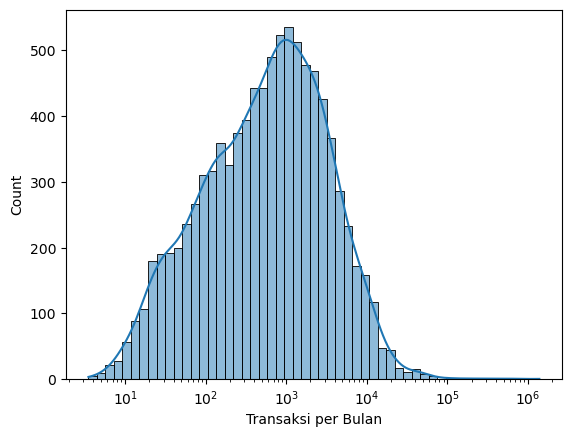

In [19]:
ax = sns.histplot(data=df, x="transaction_per_month",log_scale=True,kde=True)
ax.set(xlabel='Transaksi per Bulan')
plt.show

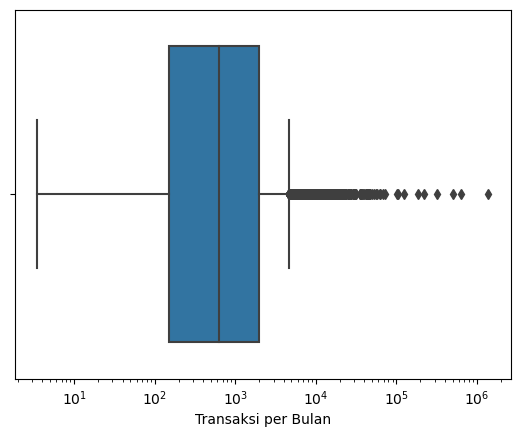

In [20]:
ax = sns.boxplot(x=df["transaction_per_month"])
ax.set(xlabel='Transaksi per Bulan')
plt.xscale('log')


Berdasarkan uji normalitas di atas, baik berdasarkan visual menggunakan histogram maupun frequestist menggunakan Shapiro-Wilk dan Kosmogorov dapat disimpulkan bahwa data 'price' maupun 'reviews_per_month' memiliki distribusi tidak normal. Karena distribusi data tidak normal maka Median digunakan sebagai measure of central tendency.

In [21]:
df['transaction_per_month'].describe()

count    9.463000e+03
mean     2.266103e+03
std      1.769924e+04
min      3.510000e+00
25%      1.500000e+02
50%      6.332300e+02
75%      1.966785e+03
max      1.390000e+06
Name: transaction_per_month, dtype: float64

In [22]:
count_rows= len(df[df.transaction_per_month > 1966.785])
count_rows

2366

Berdasarkan nilai tersebut, saya akan memfilter data menjadi dua bagian:
1. 'transaction_per_month' >= nilai quartil 3 (1966.785) akan dimasukan dalam kategori data high_transaction 
2. 'transaction_per_month' < nilai quartil 3 (1966.785) akan dimasukan dalam kategori data ordinary_transaction

Penggunaan nilai quartil 3 menjadi batas pembagian antara grup dengan nilai transaksi yang tinggi dengan nilai transaksi biasa saja karena saya mengasumsikan listing dengan nilai di atas quartil 3 adalah listing dengan performa yang baik jika dinilai berdasarkan nilai transaksi.

In [23]:
high_transaction = df[(df['transaction_per_month'] >= 1966.785)]
ordinary_transaction = df[(df['transaction_per_month'] < 1966.785)]

In [24]:
count_rows=len(high_transaction)
count_rows

2366

In [25]:
count_rows=len(ordinary_transaction)
count_rows

7097

Data yang telah difilter adalah sejumlah 2366  untuk yang memiliki nilai transaksi tinggi, dan 7097  untuk yang memiliki nilai transaksi biasa saja.

## Data Analysis

In [26]:
display(high_transaction.describe(), high_transaction.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,transaction_per_month
count,2.366000e+03,2.366000e+03,2366.000000,2366.000000,2.366000e+03,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2.366000e+03
mean,2.907038e+17,1.482080e+08,13.739890,100.556611,7.858413e+03,5.516061,55.987743,2.058423,231.145816,13.580727,7.471877e+03
std,3.441216e+17,1.353393e+08,0.028182,0.030947,5.508930e+04,27.032366,79.426817,1.512885,116.439531,17.603263,3.487608e+04
min,5.568600e+04,1.323220e+05,13.657020,100.430300,5.600000e+02,1.000000,1.000000,0.020000,1.000000,0.000000,1.967070e+03
25%,2.585304e+07,3.508287e+07,13.724065,100.539225,1.600000e+03,1.000000,6.000000,1.090000,127.000000,3.000000,2.700113e+03
50%,4.600221e+07,1.019016e+08,13.736820,100.558803,2.414000e+03,1.000000,23.000000,1.755000,267.000000,9.000000,3.893360e+03
75%,6.905125e+17,2.351355e+08,13.749697,100.569555,3.955250e+03,3.000000,76.000000,2.607500,343.750000,19.000000,6.745425e+03
max,7.888419e+17,4.907722e+08,13.951390,100.765880,1.014758e+06,998.000000,1224.000000,19.130000,365.000000,325.000000,1.390000e+06


,neighbourhood,room_type
count,2366,2366
unique,39,4
top,Khlong Toei,Entire home/apt
freq,599,1983


In [27]:
display(ordinary_transaction.describe(), ordinary_transaction.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,transaction_per_month
count,7.097000e+03,7.097000e+03,7097.000000,7097.000000,7097.000000,7097.000000,7097.000000,7097.000000,7097.000000,7097.000000,7097.000000
mean,8.532766e+16,1.307016e+08,13.743735,100.559260,1571.637593,15.477385,16.845428,0.432228,249.711286,3.126391,530.600782
std,2.258993e+17,1.178010e+08,0.043025,0.049376,1591.526882,45.243704,26.888537,0.470704,114.248843,5.335550,524.816565
min,2.793400e+04,5.892000e+04,13.600390,100.333770,295.000000,1.000000,1.000000,0.010000,1.000000,0.000000,3.510000
25%,1.781381e+07,3.068278e+07,13.717740,100.528350,800.000000,1.000000,2.000000,0.080000,150.000000,0.000000,97.420000
50%,3.109259e+07,9.457478e+07,13.737060,100.561160,1190.000000,2.000000,6.000000,0.260000,303.000000,1.000000,332.700000
75%,4.176237e+07,2.119669e+08,13.758728,100.586180,1747.000000,14.000000,20.000000,0.650000,357.000000,4.000000,841.000000
max,7.847063e+17,4.911291e+08,13.953540,100.853590,28000.000000,1000.000000,278.000000,3.480000,365.000000,79.000000,1966.500000


,neighbourhood,room_type
count,7097,7097
unique,50,4
top,Khlong Toei,Entire home/apt
freq,964,4197


## Price Based Analysis

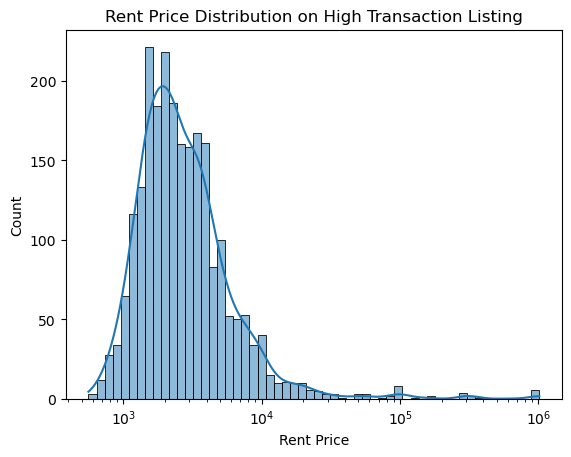

In [28]:
ax = sns.histplot(data=high_transaction, x="price",log_scale=True,kde=True)
ax.set(xlabel='Rent Price')
ax.set_title('Rent Price Distribution on High Transaction Listing')
plt.show()

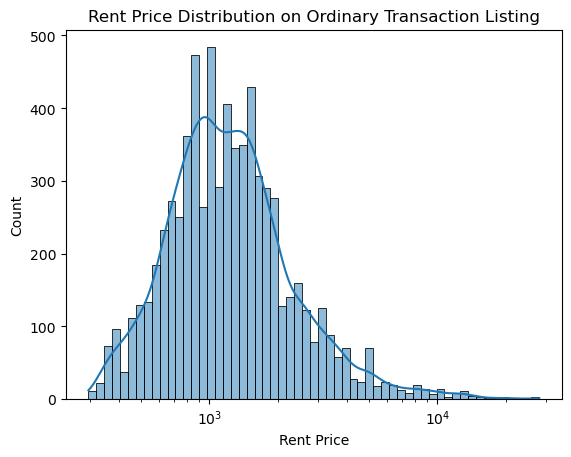

In [29]:
ax = sns.histplot(data=ordinary_transaction, x="price",log_scale=True,kde=True)
ax.set(xlabel='Rent Price')
ax.set_title('Rent Price Distribution on Ordinary Transaction Listing')
plt.show()

In [30]:
kstest(high_transaction['price'],'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=560, statistic_sign=-1)

In [31]:
kstest(ordinary_transaction['price'],'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=295, statistic_sign=-1)

In [32]:
shapiro(high_transaction['price'])

ShapiroResult(statistic=0.0752723217010498, pvalue=0.0)

In [33]:
shapiro(ordinary_transaction['price'])

ShapiroResult(statistic=0.5487563610076904, pvalue=0.0)

Baik dari visual maupun test frequentist didapatkan bahwa data price bukan merupakan distribusi normal baik di 'high_transaction' maupun 'ordinary_transaction'. Oleh karena itu akan digunakan Median Absolute Deviation sebagai variabel yang digunakan untuk melakukan analisa harga sewa lebih lanjut.

In [34]:
# Fungsi untuk menghitung median absolute deviation (MAD)
def calculate_mad(data):
    median_value = np.median(data)
    mad = np.median(np.abs(data - median_value))
    return mad

# Menghitung MAD untuk data original
mad_original = calculate_mad(high_transaction['price'])

# Jumlah sample bootstrap
num_samples = 1000

# Resampling bootstrap untuk MAD
bootstrap_mads = np.zeros(num_samples)
for i in range(num_samples):
    resampled_data = np.random.choice(high_transaction['price'], size=len(high_transaction['price']), replace=True)
    bootstrap_mads[i] = calculate_mad(resampled_data)

# Menghitung confidence interval untuk MAD
confidence_interval_mad = np.percentile(bootstrap_mads, [2.5, 97.5])

# Print results
print("Median Absolute Deviation untuk harga sewa high_transaction:", mad_original)
print("95% Confidence Interval untuk MAD harga sewa high_transaction:", confidence_interval_mad)

Median Absolute Deviation untuk harga sewa high_transaction: 965.0
95% Confidence Interval untuk MAD harga sewa high_transaction: [ 904.4875 1024.    ]


In [35]:
# Fungsi untuk menghitung median absolute deviation (MAD)
def calculate_mad(data):
    median_value = np.median(data)
    mad = np.median(np.abs(data - median_value))
    return mad

# Menghitung MAD untuk data original
mad_original = calculate_mad(ordinary_transaction['price'])

# Jumlah sample bootstrap
num_samples = 1000

# Resampling bootstrap untuk MAD
bootstrap_mads = np.zeros(num_samples)
for i in range(num_samples):
    resampled_data = np.random.choice(ordinary_transaction['price'], size=len(ordinary_transaction['price']), replace=True)
    bootstrap_mads[i] = calculate_mad(resampled_data)

# Menghitung confidence interval untuk MAD
confidence_interval_mad = np.percentile(bootstrap_mads, [2.5, 97.5])

# Print results
print("Median Absolute Deviation untuk harga sewa ordinary_transaction:", mad_original)
print("95% Confidence Interval untuk MAD harga sewa ordinary_transaction:", confidence_interval_mad)

Median Absolute Deviation untuk harga sewa ordinary_transaction: 428.0
95% Confidence Interval untuk MAD harga sewa ordinary_transaction: [407. 450.]


Berdasarkan perhitungan di atas dapat disimpulkan:  
a. listing pada dataframe high_transaction:  
    - Nilai median untuk harga sewa dari listing dengan nilai transaksi yang tinggi adalah 965  
    - Interval tingkat kepercayaan harga sewa listing dengan performa yang baik berada di antara 906.4875 dan 1023.5125, dengan tingkat keyakinan 95% dan 5% berada di luar interval tersebut.
    
b. listing pada dataframe ordinary_transaction:  
    - Nilai median untuk harga sewa dari listing dengan nilai transaksi yang biasa adalah 428 
    - Interval tingkat kepercayaan harga sewa listing dengan performa yang baik berada di antara 408.975 dan 450, dengan tingkat keyakinan 95% dan 5% berada di luar interval tersebut.

Dari hasil perhitungan di atas dapat kita simpulkan bahwa harga sewa untuk listing yang dengan nilai transaksi tinggi memiliki nilai median harga sewa yang jauh lebih tinggi dari harga sewa listing dengan nilai transaksi biasa saja, untuk mengkonfirmasinya secara statistik kita bisa menggunakan Mann-Whitney U Test karena kedua data di atas adalah data independen dan akan ditest apakah ada perbedaan signfikan pada harga sewa.

In [36]:
# Mann-Whitney U Test

statistic, p_value = mannwhitneyu(high_transaction['price'], ordinary_transaction['price'])
print("Mann-Whitey U Test")
print("------------------")
print("Null Hypothesis (H0): Tidak ada perbedaan signifikan pada harga sewa diantara listing 'high_transaction' dan 'ordinary_transaction'.")
print("Alternative Hypothesis (H1): Ada perbedaan signifikan pada harga sewa diantara listing 'high_transaction' dan 'ordinary_transaction'.")
print(f'Mann-Whitney U Statistic: {statistic}')
print(f'P-value: {p_value}')

# Check signifikansi (menggunakan nilai alpha 0.05)
if p_value < 0.05:
    print("Karena p_value < 0.05, maka menolak null hypothesis: Ada perbedaan signifikan pada harga sewa diantara listing 'high_transaction' dan 'ordinary_transaction'.")
else:
    print("Karena p_value >= 0.05, maka gagal untuk menolak null hypothesis: Tidak ada perbedaan signifikan pada harga sewa diantara listing 'high_transaction' dan 'ordinary_transaction'.")

Mann-Whitey U Test
------------------
Null Hypothesis (H0): Tidak ada perbedaan signifikan pada harga sewa diantara listing 'high_transaction' dan 'ordinary_transaction'.
Alternative Hypothesis (H1): Ada perbedaan signifikan pada harga sewa diantara listing 'high_transaction' dan 'ordinary_transaction'.
Mann-Whitney U Statistic: 13582467.0
P-value: 0.0
Karena p_value < 0.05, maka menolak null hypothesis: Ada perbedaan signifikan pada harga sewa diantara listing 'high_transaction' dan 'ordinary_transaction'.


Hasil dari Mann-Whitney U Test di atas mengkonfirmasi bahwa terdapat perbedaan signifikan pada harga sewa di pada listing dengan nilai transaksi yang tinggi dan listing yang memiliki nilai transaksi biasa saja.

## Reviews per Month Based Analysis

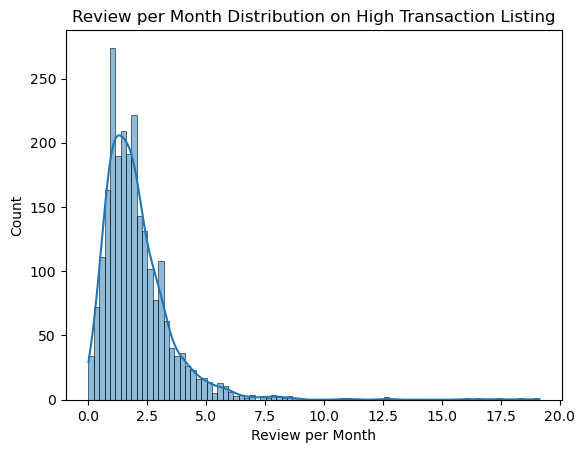

In [37]:
ax = sns.histplot(data=high_transaction, x="reviews_per_month",log_scale=False,kde=True)
ax.set(xlabel='Review per Month')
ax.set_title('Review per Month Distribution on High Transaction Listing')
plt.show()

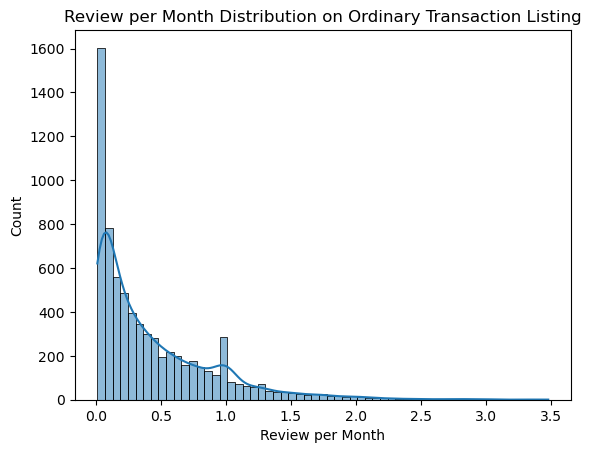

In [38]:
ax = sns.histplot(data=ordinary_transaction, x="reviews_per_month",log_scale=False,kde=True)
ax.set(xlabel='Review per Month')
ax.set_title('Review per Month Distribution on Ordinary Transaction Listing')

plt.show()

In [39]:
kstest(high_transaction['reviews_per_month'],'norm')

KstestResult(statistic=0.6694319555786523, pvalue=0.0, statistic_location=0.71, statistic_sign=-1)

In [40]:
kstest(ordinary_transaction['reviews_per_month'],'norm')

KstestResult(statistic=0.5039893563146316, pvalue=0.0, statistic_location=0.01, statistic_sign=-1)

In [41]:
shapiro(high_transaction['reviews_per_month'])

ShapiroResult(statistic=0.7627521753311157, pvalue=0.0)

In [42]:
shapiro(ordinary_transaction['reviews_per_month'])

ShapiroResult(statistic=0.8106310963630676, pvalue=0.0)

Baik dari visual maupun test frequentist didapatkan bahwa data jumlah review per bulan bukan merupakan distribusi normal baik di 'high_transaction' maupun 'ordinary_transaction'. Oleh karena itu akan digunakan Median Absolute Deviation sebagai variabel yang digunakan untuk melakukan analisa jumlah review per bulan lebih lanjut.

In [43]:
# Fungsi untuk menghitung median absolute deviation (MAD)
def calculate_mad(data):
    median_value = np.median(data)
    mad = np.median(np.abs(data - median_value))
    return mad

# Menghitung MAD untuk data original
mad_original = calculate_mad(high_transaction['reviews_per_month'])

# Jumlah sample bootstrap
num_samples = 1000

# Resampling bootstrap untuk MAD
bootstrap_mads = np.zeros(num_samples)
for i in range(num_samples):
    resampled_data = np.random.choice(high_transaction['reviews_per_month'], size=len(high_transaction['reviews_per_month']), replace=True)
    bootstrap_mads[i] = calculate_mad(resampled_data)

# Menghitung confidence interval untuk MAD
confidence_interval_mad = np.percentile(bootstrap_mads, [2.5, 97.5])

# Print results
print("Median Absolute Deviation jumlah untuk review per bulan listing high_transaction:", mad_original)
print("95% Confidence Interval untuk MAD jumlah review per bulan listing  high_transaction:", confidence_interval_mad)

Median Absolute Deviation jumlah untuk review per bulan listing high_transaction: 0.7350000000000003
95% Confidence Interval untuk MAD jumlah review per bulan listing  high_transaction: [0.69 0.78]


In [44]:
# Fungsi untuk menghitung median absolute deviation (MAD)
def calculate_mad(data):
    median_value = np.median(data)
    mad = np.median(np.abs(data - median_value))
    return mad

# Menghitung MAD untuk data original
mad_original = calculate_mad(ordinary_transaction['reviews_per_month'])

# Jumlah sample bootstrap
num_samples = 1000

# Resampling bootstrap untuk MAD
bootstrap_mads = np.zeros(num_samples)
for i in range(num_samples):
    resampled_data = np.random.choice(ordinary_transaction['reviews_per_month'], size=len(ordinary_transaction['reviews_per_month']), replace=True)
    bootstrap_mads[i] = calculate_mad(resampled_data)

# Menghitung confidence interval untuk MAD
confidence_interval_mad = np.percentile(bootstrap_mads, [2.5, 97.5])

# Print results
print("Median Absolute Deviation untuk jumlah review per bulan listing  ordinary_transaction:", mad_original)
print("95% Confidence Interval untuk MAD jumlah review per bulan listing  ordinary_transaction:", confidence_interval_mad)

Median Absolute Deviation untuk jumlah review per bulan listing  ordinary_transaction: 0.22
95% Confidence Interval untuk MAD jumlah review per bulan listing  ordinary_transaction: [0.21 0.23]


Berdasarkan perhitungan di atas dapat disimpulkan:  
a. listing pada dataframe high_transaction:  
    - Nilai median untuk jumlah review per bulan dari listing dengan nilai transaksi yang tinggi adalah 0.735  
    - Interval tingkat kepercayaan jumlah review per bulan listing dengan performa yang baik berada di antara 0.69 dan 0.77, dengan tingkat keyakinan 95% dan 5% berada di luar interval tersebut.
    
b. listing pada dataframe ordinary_transaction:  
    - Nilai median untuk jumlah review per bulan dari listing dengan nilai transaksi yang biasa adalah 0.22 
    - Interval tingkat kepercayaan jumlah review per bulan listing dengan performa yang baik berada di antara 0.21 dan 0.23, dengan tingkat keyakinan 95% dan 5% berada di luar interval tersebut.

Dari hasil perhitungan di atas dapat kita simpulkan bahwa jumlah review per bulan untuk listing dengan nilai transaksi tinggi memiliki nilai median jumlah review per bulan yang jauh lebih tinggi dari listing dengan nilai transaksi biasa saja, untuk mengkonfirmasinya secara statistik kita bisa menggunakan Mann-Whitney U Test karena kedua data di atas adalah data independen dan akan ditest apakah ada perbedaan signfikan pada harga sewa.

In [45]:
# Mann-Whitney U Test

statistic, p_value = mannwhitneyu(high_transaction['reviews_per_month'], ordinary_transaction['reviews_per_month'])
print("Mann-Whitey U Test")
print("------------------")
print("Null Hypothesis (H0): Tidak ada perbedaan signifikan pada jumlah review per bulan diantara listing 'high_transaction' dan 'ordinary_transaction'.")
print("Alternative Hypothesis (H1): Ada perbedaan signifikan pada jumlah review per bulan diantara listing 'high_transaction' dan 'ordinary_transaction'.")
print(f'Mann-Whitney U Statistic: {statistic}')
print(f'P-value: {p_value}')

# Check signifikansi (menggunakan nilai alpha 0.05)
if p_value < 0.05:
    print("Karena p_value < 0.05, maka menolak null hypothesis: Ada perbedaan signifikan pada jumlah review per bulan diantara listing 'high_transaction' dan 'ordinary_transaction'.")
else:
    print("Karena p_value >= 0.05, maka gagal untuk menolak null hypothesis: Tidak ada perbedaan signifikan pada jumlah review per bulan diantara listing 'high_transaction' dan 'ordinary_transaction'.")

Mann-Whitey U Test
------------------
Null Hypothesis (H0): Tidak ada perbedaan signifikan pada jumlah review per bulan diantara listing 'high_transaction' dan 'ordinary_transaction'.
Alternative Hypothesis (H1): Ada perbedaan signifikan pada jumlah review per bulan diantara listing 'high_transaction' dan 'ordinary_transaction'.
Mann-Whitney U Statistic: 15574178.5
P-value: 0.0
Karena p_value < 0.05, maka menolak null hypothesis: Ada perbedaan signifikan pada jumlah review per bulan diantara listing 'high_transaction' dan 'ordinary_transaction'.


Hasil dari Mann-Whitney U Test di atas mengkonfirmasi bahwa terdapat perbedaan signifikan pada jumlah review per bulan pada listing dengan nilai transaksi yang tinggi dan listing yang memiliki nilai transaksi biasa saja.

## Neighborhood Based Analysis

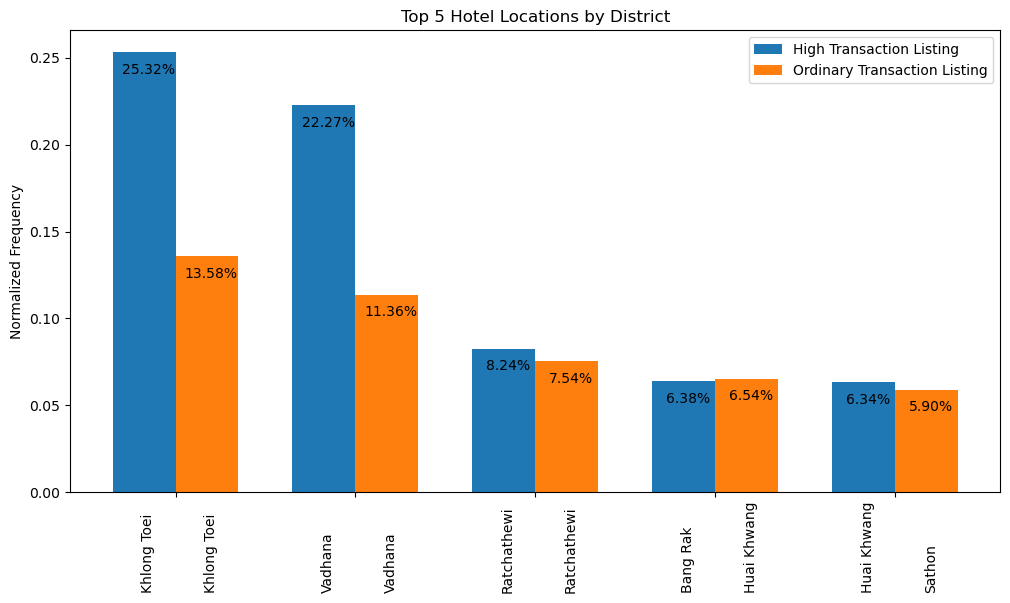

In [46]:
# Count the occurrences of each location for both datasets
location_counts1 = high_transaction['neighbourhood'].value_counts()
location_counts2 = ordinary_transaction['neighbourhood'].value_counts()

# Calculate normalized values for both datasets
normalized_values1 = location_counts1 / location_counts1.sum()
normalized_values2 = location_counts2 / location_counts2.sum()

# Select the top 5 locations for both datasets and sort them
top_locations1 = normalized_values1.sort_values(ascending=False).head(5)
top_locations2 = normalized_values2.sort_values(ascending=False).head(5)

# Plotting the combined bar chart side by side
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
bar_positions1 = range(len(top_locations1))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

ax.bar(bar_positions1, top_locations1, width=bar_width, label='High Transaction Listing')
ax.bar(bar_positions2, top_locations2, width=bar_width, label='Ordinary Transaction Listing')

ax.set_xticks([pos + bar_width / 2 for pos in bar_positions1])
ax.set_xticklabels([])

# Add labels to every bar with neighborhood names at the bottom with vertical orientation
for pos, neighborhood in zip(bar_positions1, top_locations1.index):
    ax.text(pos + bar_width / 15, -0.058, f'{neighborhood}', ha='center', va='bottom', rotation=90)

for pos, neighborhood in zip(bar_positions2, top_locations2.index):
    ax.text(pos + bar_width / 15, -0.058, f'{neighborhood}', ha='center', va='bottom', rotation=90)

# Add percentage labels below the bars
for pos, value in zip(bar_positions1, top_locations1):
    ax.text(pos + bar_width / 15, value - 0.01, f'{value:.2%}', ha='center', va='center')

for pos, value in zip(bar_positions2, top_locations2):
    ax.text(pos + bar_width / 15, value - 0.01, f'{value:.2%}', ha='center', va='center')

plt.title('Top 5 Hotel Locations by District')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.show()

Dari hasil analisa mengenai komposisi letak hotel berdasarkan distrik atau 'neighborhood' di atas dapat ditarik informasi sebagai berikut:
1. Komposisi 5 distrik dengan nilai transaksi terbesar baik dari listing 'high_transaction' maupun 'ordinary_transaction' hampir sama. Distrik Khlong tei, Vadhana, Ratchathewi, dan Huai Khwang muncul di 5 besar distrik dengan nilai transaksi terbesar baik di listing 'high_transaction' maupun 'ordinary_transaction', hanya ada 1 distrik yang berbeda yaitu Bang Rak untuk 'high_transaction' dan Saton untuk 'ordinary_transaction'
2. Perbedaan mencolok dari analisa visual di atas adalah pada listing 'high_transaction' distrik Khlong Tei dan Vadhana memiliki proporsi yang jauh lebih besar dari distrik lainnya, jika digabungkan kedua distrik merepresentasikan hampir 50% dari lokasi hotel pada listing 'high_transaction'. Sedangkan pada listing 'ordinary_transaction' meskipun Khlong Tei dan Vadhana tetap menjadi dua distrik dengan proporsi tertinggi dengan total proporsi sekitar 25%, perbedaan dengan distrik lainnya tidak sesignifikan pada listing 'high_transaction'.

Hasil observasi di atas menunjukan bahwa listing dengan nilai transaksi yang tinggi memiliki peluang lebih besar berada di Khlong Tei dan Vadhana. untuk mengkonfirmasinya bahwa lokasi distrik memiliki pengaruh terhadap nilai transaksi secara statistik kita bisa menggunakan Chi Squared Test karena kedua data di atas adalah data independen dan akan ditest apakah ada asosiasi antara lokasi distrik dan nilai transaksi (tinggi atau kecil).

In [47]:
# Chi Squared Test

# Add 'transaction_category' and combine two dataframe
high_transaction["transaction_category"] = 'high'
ordinary_transaction["transaction_category"] = 'ordinary'
# Define a function to categorize the minimum_stay values
def categorize_stay(minimum_stay):
    if minimum_stay <= 7:
        return 'Short Term'
    elif 8 <= minimum_stay <= 30:
        return 'Mid Term'
    else:
        return 'Long Term'

# Apply the categorization logic and create a new column 'stay_category'
high_transaction['stay_category'] = df['minimum_nights'].apply(categorize_stay)
ordinary_transaction['stay_category'] = df['minimum_nights'].apply(categorize_stay)
combined_transaction = pd.concat([high_transaction, ordinary_transaction], axis=0)
combined_transaction.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,transaction_per_month
count,9.463000e+03,9.463000e+03,9463.000000,9463.000000,9.463000e+03,9463.000000,9463.000000,9463.000000,9463.000000,9463.000000,9.463000e+03
mean,1.366771e+17,1.350786e+08,13.742774,100.558598,3.143498e+03,12.986791,26.632041,0.838820,245.069428,5.740252,2.266103e+03
std,2.752796e+17,1.226489e+08,0.039869,0.045487,2.771027e+04,41.670055,49.054578,1.110935,115.075505,10.922362,1.769924e+04
min,2.793400e+04,5.892000e+04,13.600390,100.333770,2.950000e+02,1.000000,1.000000,0.010000,1.000000,0.000000,3.510000e+00
25%,1.935370e+07,3.127677e+07,13.720055,100.530690,9.000000e+02,1.000000,2.000000,0.120000,145.000000,0.000000,1.500000e+02
50%,3.312411e+07,9.554808e+07,13.736940,100.559310,1.400000e+03,2.000000,8.000000,0.460000,299.000000,2.000000,6.332300e+02
75%,4.824236e+07,2.157966e+08,13.755660,100.581965,2.222000e+03,7.000000,29.000000,1.100000,354.000000,7.000000,1.966785e+03
max,7.888419e+17,4.911291e+08,13.953540,100.853590,1.014758e+06,1000.000000,1224.000000,19.130000,365.000000,325.000000,1.390000e+06


In [48]:
# Create a contingency table
contingency_table = pd.crosstab(combined_transaction['neighbourhood'], combined_transaction['transaction_category'])

# Perform the Chi-Square Test for Independence
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Output the results
print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_value}')

# Check for significance (using a common significance level like 0.05)
if p_value < 0.05:
    print("Karena p_value < 0.05, maka menolak null hypothesis: Ada asosiasi signifikan antara nilai transaksi dan lokasi hotel.")
else:
    print("Karena p_value > 0.05, maka gagal menolak null hypothesis: Tidak ada asosiasi signifikan antar nilai transaksi dan lokasi hotel.")

Chi-Square Statistic: 688.5162989096905
P-value: 1.0905221315060438e-113
Karena p_value < 0.05, maka menolak null hypothesis: Ada asosiasi signifikan antara nilai transaksi dan lokasi hotel.


Hasil dari Chi-Squared Test di atas mengkonfirmasi bahwa terdapat asosiasi  signifikan di antara lokasi hotel dengan nilai transaksi. Selanjutnya saya akan mencoba mem-plot lokasi tiap hotel ke map Bangkok.

In [49]:
# Sample 50 rows from the high_transaction and ordinary_transaction
high_sample = high_transaction.sample(300, random_state=1)
ordinary_sample = ordinary_transaction.sample(300, random_state=1)

# Bangkok Map
bangkok_map = folium.Map(location=[13.746944, 100.539719], zoom_start=12)

# Bangkok Center Circle Marker
folium.Circle(location=[13.7399887067, 100.526547894],
                  radius=5000, popup = 'Bangkok Center', fill=True, fill_color = 'blue').add_to(bangkok_map)

# Add markers for each location from high_transaction DataFrame with a small blue icon
for index, row in high_sample.iterrows():
    coordinates = [row['latitude'], row['longitude']]
    folium.Marker(location=coordinates,
                  icon=folium.Icon(color='blue', icon='hotel', prefix='fa', icon_color='blue', popup=None, icon_size=(0, 0))).add_to(bangkok_map)

# Add markers for each location from ordinary_transaction DataFrame with a small green icon
for index, row in ordinary_sample.iterrows():
    coordinates = [row['latitude'], row['longitude']]
    folium.Marker(location=coordinates,
                  icon=folium.Icon(color='green', icon='hotel', prefix='fa', icon_color='green', popup=None, icon_size=(0, 0))).add_to(bangkok_map)

# Display the map in the Jupyter Notebook
bangkok_map

Pada plot di atas saya memasukan sample lokasi hotel high_transaction (icon rumah warna biru) dan ordinary_transcation (icon rumah warna hijau) masing-masing berjumlah 300 dan saya juga memasukan icon lingkaran yang menunjukan radius sebesar 5 km dari Siam Square yang saya asumsikan sebagai pusat Bangkok.

Dapat dilihat dari visualisasi di atas, listing properti dengan nilai transaksi tinggi atau 'high_transaction' memiliki lokasi yang yang lebih terkonsentrasi terletak di dekat dengan pusat Bangkok dibandingkan dengan listing properti 'ordinary_transaction'.

## Room Type Based Analysis

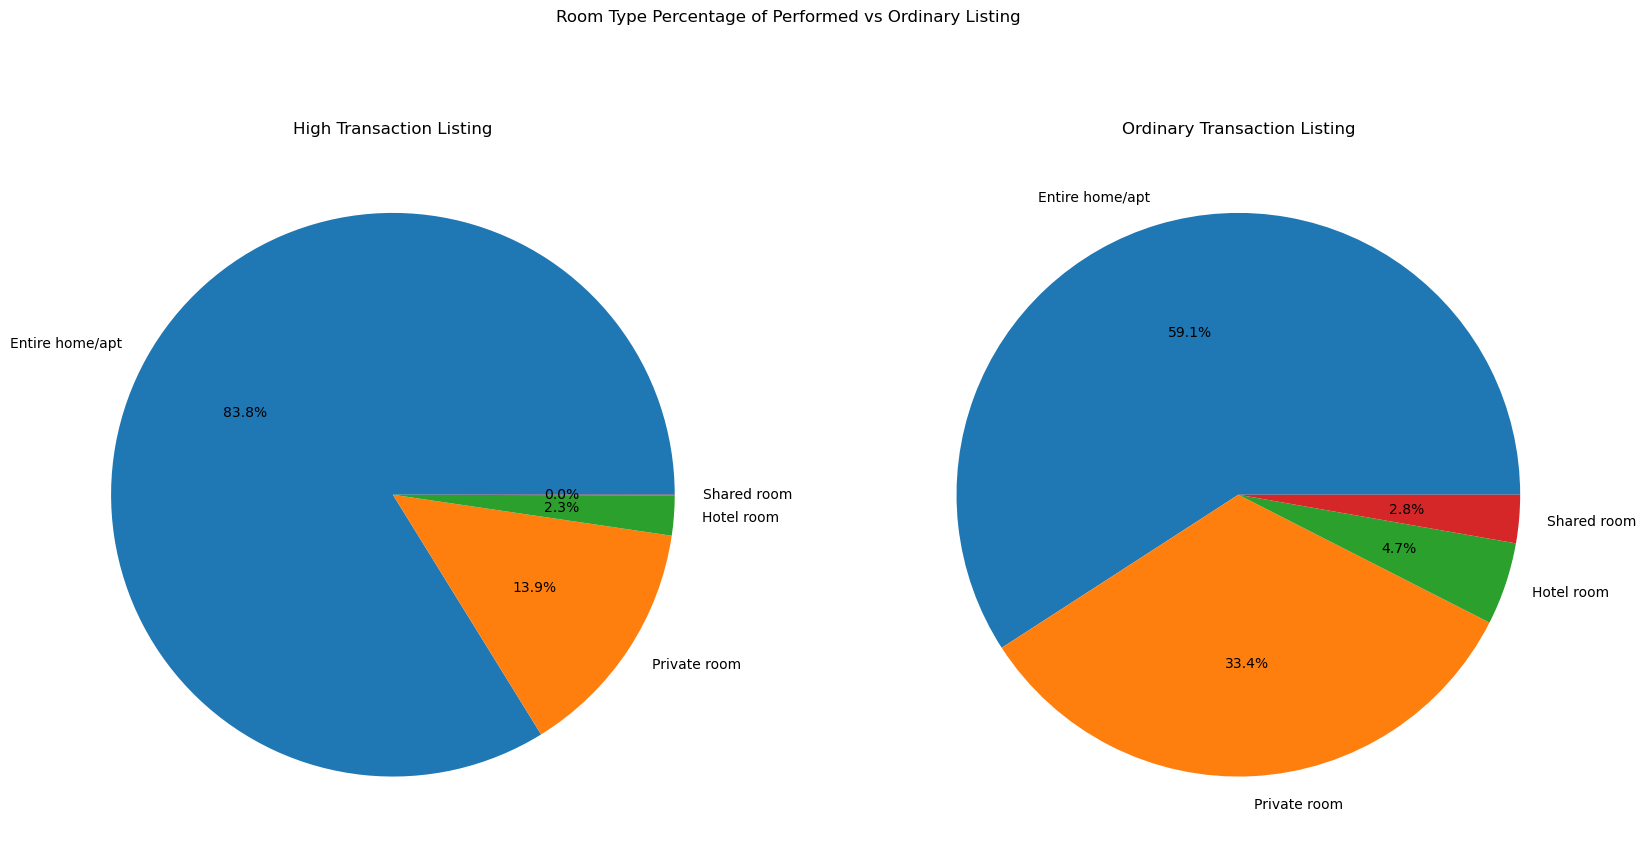

In [50]:
# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot pie chart for DataFrame 1
high_transaction["room_type"].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', label='',startangle=0)
axes[0].set_title('High Transaction Listing')

# Plot pie chart for DataFrame 2
ordinary_transaction["room_type"].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', label='',startangle=0)
axes[1].set_title('Ordinary Transaction Listing')

# Set common title for the entire figure
fig.suptitle('Room Type Percentage of Performed vs Ordinary Listing ')

# Set label size for both x and y axes
for ax in axes:
    ax.tick_params(axis='both', which='both', labelsize=12)
    
# Show the plots
plt.show()

Dari hasil analisa mengenai komposisi Tipe Ruangan Properti di atas dapat ditarik informasi sebagai berikut:
1. Baik di listing 'high_transaction' maupun 'oridanary_transaction' memiliki urutan proporsi yang sama yaitu seluruh bangunan/apartemen, private room, hotel room, dan shared room.
2. Proporsi tipe properti yang menawarkan seluruh bangunan atau apartemen ('Entire home/apt') yang mencapai sekitar 85% pada 'high_transaction' jauh lebih besar dibandingkan pada 'ordinary_transaction' yang mencapai sekitar 60%.
3. Tipe properti 'Entire home/apt', 'Private room', dan 'Hotel room' merupakan ruangan private jauh lebih mendominasi dibandingkan dengan 'Shared room' atau ruangan bersama.

Hasil observasi di atas menunjukan bahwa tpe ruangan mempengaruhi nilai transaksi dari properti. untuk mengkonfirmasinya secara statistik kita bisa menggunakan Chi Squared Test karena kedua data di atas adalah data independen dan akan ditest apakah ada asosiasi tipe properti dan nilai transaksi (tinggi atau kecil).

In [51]:
# Create a contingency table
contingency_table = pd.crosstab(combined_transaction['room_type'], combined_transaction['transaction_category'])

# Perform the Chi-Square Test for Independence
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Output the results
print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_value}')

# Check for significance (using a common significance level like 0.05)
if p_value < 0.05:
    print("Karena p_value < 0.05, maka menolak null hypothesis: Ada asosiasi signifikan antara nilai transaksi dan tipe properti.")
else:
    print("Karena p_value > 0.05, maka gagal menolak null hypothesis: Tidak ada asosiasi signifikan antara nilai transaksi dan tipe properti.")

Chi-Square Statistic: 491.2574225446013
P-value: 3.74353660949357e-106
Karena p_value < 0.05, maka menolak null hypothesis: Ada asosiasi signifikan antara nilai transaksi dan tipe properti.


## Minimum Rent Duration Based Analysis
Untuk melakukan analisa mengenai jumlah minimal untuk menyewa properti, saya akan memasukan minimum dalam beberapa kategori, yaitu:
1. Short Term: 1 - 7 hari
2. Medium Term Stay: 7 - 30 hari
3. Long Term: > 30 hari

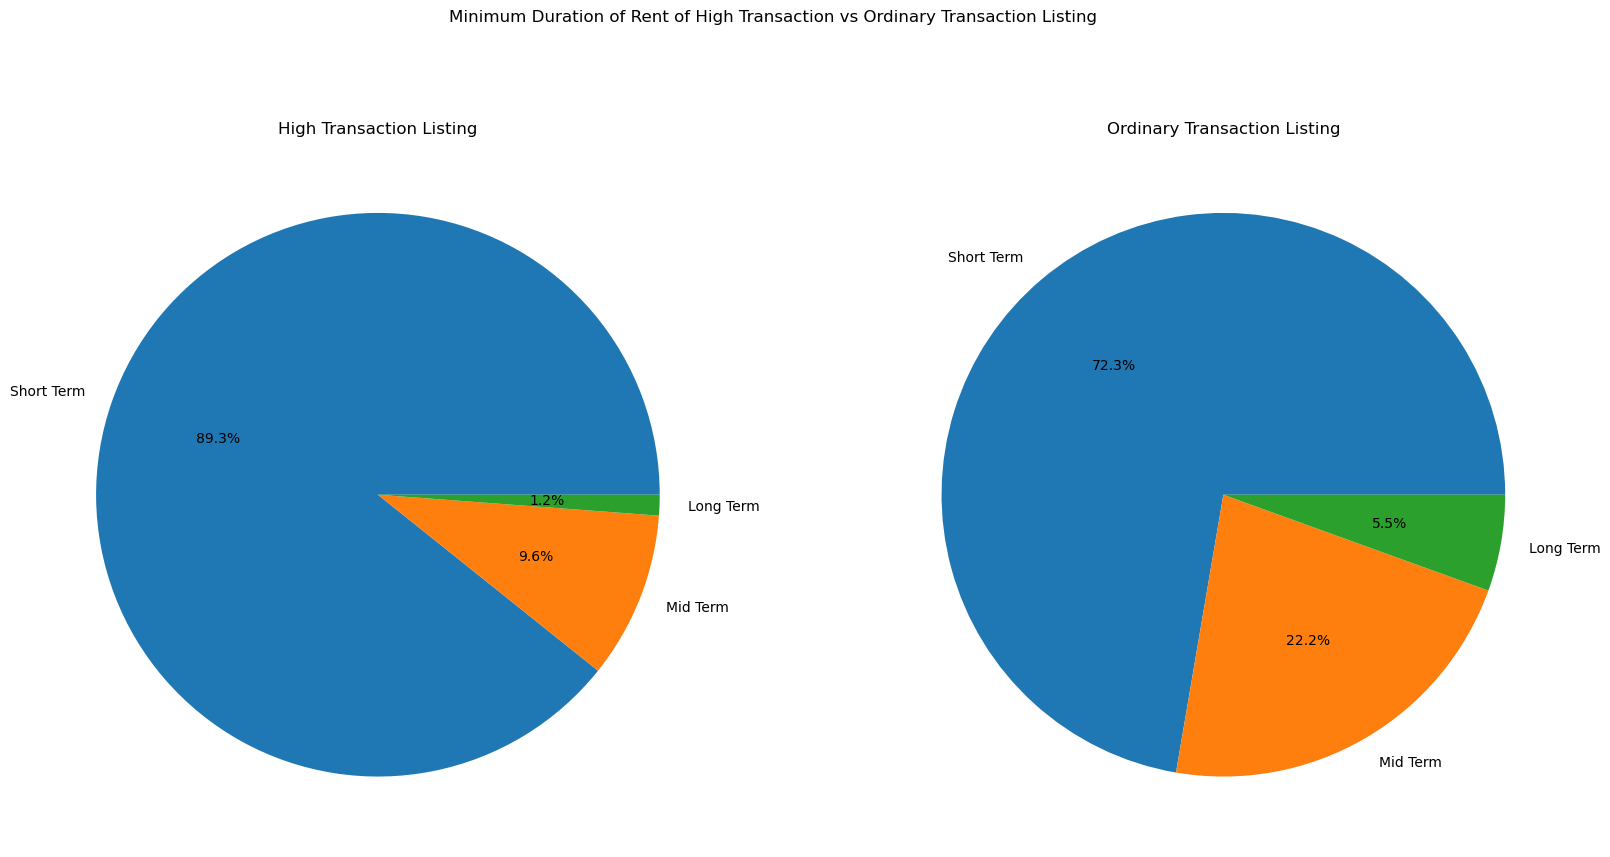

In [52]:
# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot pie chart for DataFrame 1
high_transaction["stay_category"].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', label='',startangle=0)
axes[0].set_title('High Transaction Listing')

# Plot pie chart for DataFrame 2
ordinary_transaction["stay_category"].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', label='',startangle=0)
axes[1].set_title('Ordinary Transaction Listing')

# Set common title for the entire figure
fig.suptitle('Minimum Duration of Rent of High Transaction vs Ordinary Transaction Listing ')

# Set label size for both x and y axes
for ax in axes:
    ax.tick_params(axis='both', which='both', labelsize=12)
    
# Show the plots
plt.show()

Dari hasil analisa mengenai komposisi waktu sewa minimal di atas dapat ditarik informasi sebagai berikut:
1. Baik di listing 'high_transaction' maupun 'oridanary_transaction', semakin sebentar durasi minimal untuk sewa, properti semakin banyak diminati.
2. Proporsi jumlah tipe properti yang menawarkan durasi minimal sewa secara short term atau <= 7 hari mencapai sekitar 90% pada 'high_transaction' lebih besar dibandingkan pada 'ordinary_transaction' yang mencapai sekitar 75%.

Hasil observasi di atas menunjukan bahwa durasi minimal untuk menyewa properti mempengaruhi nilai transaksi dari properti. untuk mengkonfirmasinya secara statistik kita bisa menggunakan Chi Squared Test karena kedua data di atas adalah data independen dan akan ditest apakah ada asosiasi durasi minimal menginap dan nilai transaksi (tinggi atau kecil).

In [53]:
# Create a contingency table
contingency_table = pd.crosstab(combined_transaction['stay_category'], combined_transaction['transaction_category'])

# Perform the Chi-Square Test for Independence
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Output the results
print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_value}')

# Check for significance (using a common significance level like 0.05)
if p_value < 0.05:
    print("Karena p_value < 0.05, maka menolak null hypothesis: Ada asosiasi signifikan antara nilai transaksi dan durasi minimal untuk menginap.")
else:
    print("Karena p_value > 0.05, maka gagal menolak null hypothesis: Tidak ada asosiasi signifikan antara nilai transaksi dan durasi minimal untuk menginap.")

Chi-Square Statistic: 290.3930303412735
P-value: 8.74892452146051e-64
Karena p_value < 0.05, maka menolak null hypothesis: Ada asosiasi signifikan antara nilai transaksi dan durasi minimal untuk menginap.


## Bivariate Analysis
### Analisa Harga Sewa berdasarkan Tipe Kamar

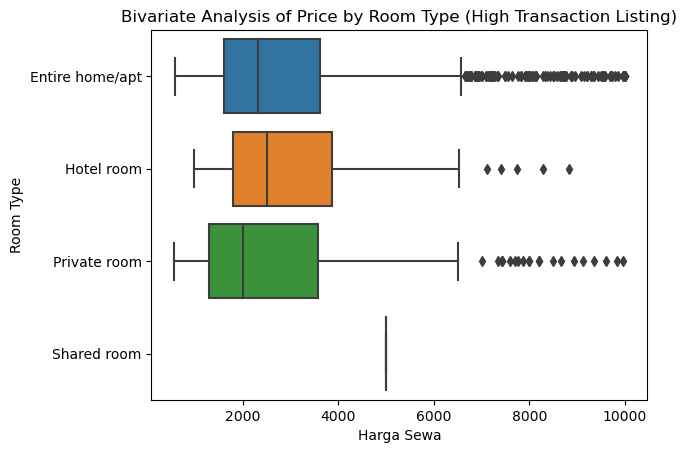

In [54]:
# Filter the price to help with visualization
filtered_price = high_transaction[high_transaction['price'] < 10000]

# Use seaborn's boxplot to visualize the relationship between price and room type
sns.boxplot(x='price', y='room_type', data=filtered_price)

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=0)

# Add label
plt.xlabel('Harga Sewa')
plt.ylabel('Room Type')
plt.title('Bivariate Analysis of Price by Room Type (High Transaction Listing)')

# Show the plot
plt.show()

In [55]:
# Calculate median, MAD, lower bound, and upper bound for each room type
result_df = high_transaction.groupby('room_type')['price'].agg(['median', lambda x: pd.Series.median(abs(x - x.median())), 'min', 'max']).reset_index()
result_df.columns = ['Room Type', 'Median', 'MAD', 'Lower Bound', 'Upper Bound']
# Display the result table
print(result_df)

         Room Type  Median     MAD  Lower Bound  Upper Bound
0  Entire home/apt  2416.0   927.0          589      1014758
1       Hotel room  2603.5  1101.5          990       300000
2     Private room  2288.5  1226.5          560       600700
3      Shared room  5000.0     0.0         5000         5000


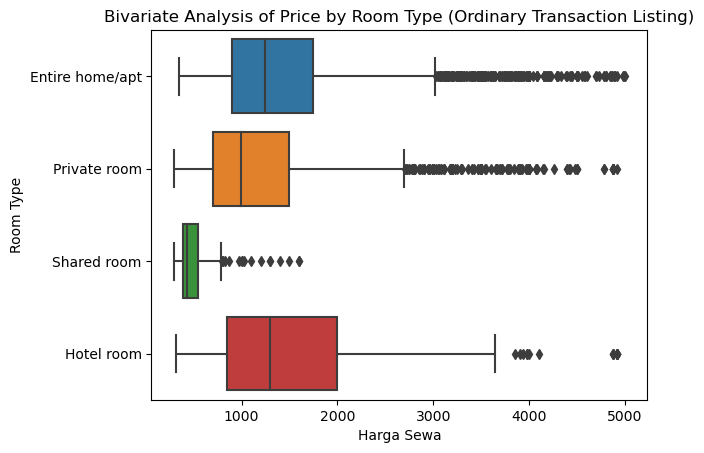

In [56]:
# Filter the price to help with visualization
filtered_price = ordinary_transaction[ordinary_transaction['price'] < 5000]

# Use seaborn's boxplot to visualize the relationship between price and room type
sns.boxplot(x='price', y='room_type', data=filtered_price)

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=0)

# Add label
plt.xlabel('Harga Sewa')
plt.ylabel('Room Type')
plt.title('Bivariate Analysis of Price by Room Type (Ordinary Transaction Listing)')
# Show the plot
plt.show()

In [57]:
# Calculate median, MAD, lower bound, and upper bound for each room type
result_df = ordinary_transaction.groupby('room_type')['price'].agg(['median', lambda x: pd.Series.median(abs(x - x.median())), 'min', 'max']).reset_index()
result_df.columns = ['Room Type', 'Median', 'MAD', 'Lower Bound', 'Upper Bound']
# Display the result table
print(result_df)

         Room Type  Median    MAD  Lower Bound  Upper Bound
0  Entire home/apt  1280.0  426.0          346        27000
1       Hotel room  1353.5  567.5          318        14630
2     Private room  1000.0  350.0          300        28000
3      Shared room   433.5   66.5          295         1600


### Analisa Harga Sewa berdasarkan Lokasi Distrik

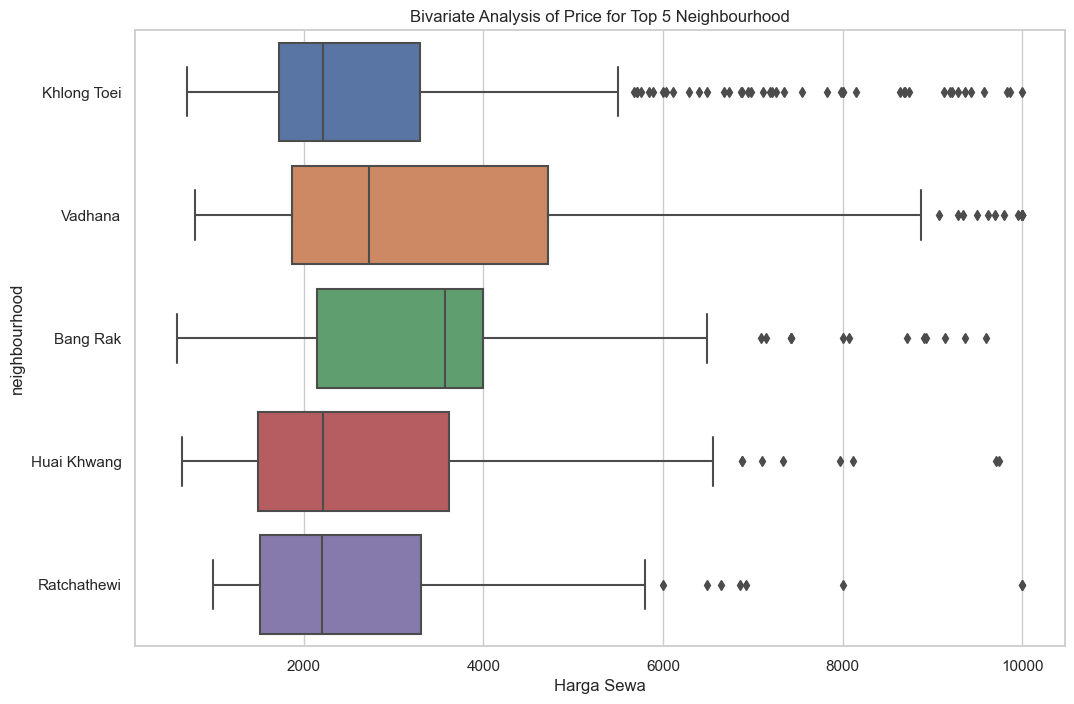

In [58]:
# Find the top 5 most common locations
top_locations = high_transaction['neighbourhood'].value_counts().head(5).index

# Filter DataFrame to include only the top 5 locations
filtered_df = high_transaction[high_transaction['neighbourhood'].isin(top_locations)]

# filter price to help visualization
filtered_df = filtered_df[filtered_df['price'] <= 10000]

# Set up the plotting style
sns.set(style="whitegrid")

# Create a boxplot for bivariate analysis
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='price', y='neighbourhood',data=filtered_df)

# Add x-label
plt.xlabel('Harga Sewa')

# Set a title for the plot
plt.title('Bivariate Analysis of Price for Top 5 Neighbourhood')

# Show the plot
plt.show()

In [59]:
# Find the top 5 most common locations
top_locations = high_transaction['neighbourhood'].value_counts().head(5).index

# Filter DataFrame to include only the top 5 locations
filtered_df = high_transaction[high_transaction['neighbourhood'].isin(top_locations)]

# Calculate median, MAD, upper bound, and lower bound for each location
result_df = pd.DataFrame()

for location in top_locations:
    location_data = filtered_df[filtered_df['neighbourhood'] == location]['price']
    
    median_price = location_data.median()
    mad_price = np.median(np.abs(location_data - median_price))
    
    upper_bound = median_price + (3 * mad_price)
    lower_bound = median_price - (3 * mad_price)
    
    result_df = result_df.append({
        'Location': location,
        'Median': median_price,
        'MAD': mad_price,
        'Upper Bound': upper_bound,
        'Lower Bound': lower_bound
    }, ignore_index=True)

# Display the result DataFrame
print(result_df)

      Location  Median     MAD  Upper Bound  Lower Bound
0  Khlong Toei  2271.0   691.0       4344.0        198.0
1      Vadhana  2859.0  1184.0       6411.0       -693.0
2  Ratchathewi  2328.0   828.0       4812.0       -156.0
3     Bang Rak  3571.0  1017.0       6622.0        520.0
4  Huai Khwang  2239.0   876.5       4868.5       -390.5


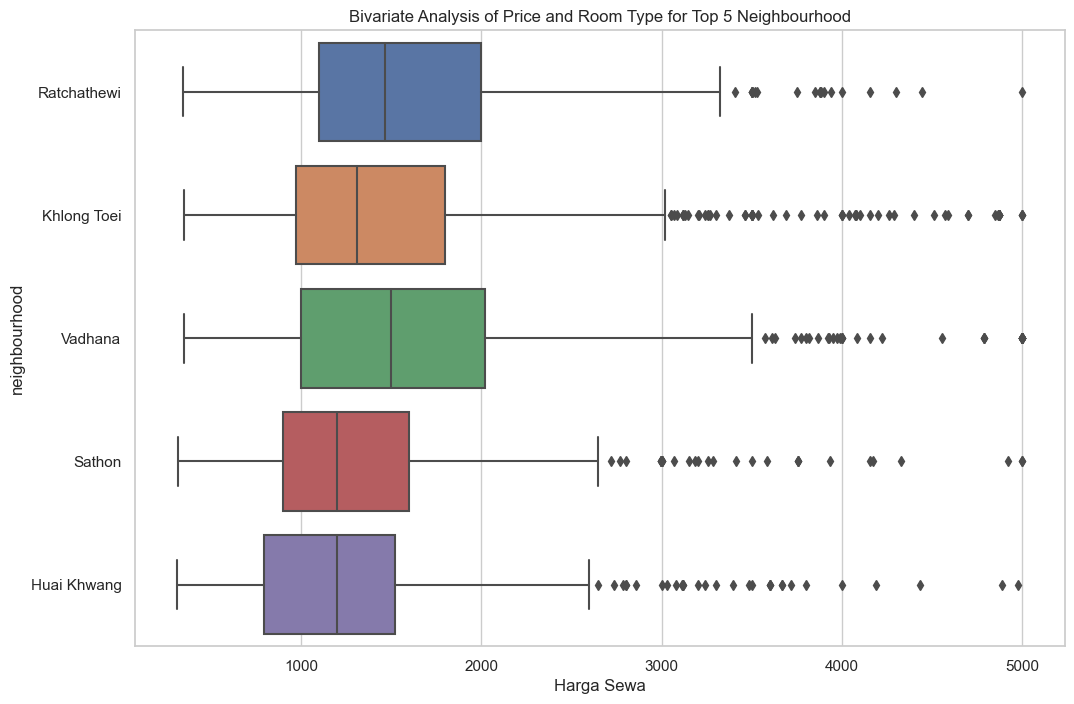

In [60]:
# Find the top 5 most common locations
top_locations = ordinary_transaction['neighbourhood'].value_counts().head(5).index

# Filter DataFrame to include only the top 5 locations
filtered_df = ordinary_transaction[ordinary_transaction['neighbourhood'].isin(top_locations)]

# filter price to help visualization
filtered_df = filtered_df[filtered_df['price'] <= 5000]

# Set up the plotting style
sns.set(style="whitegrid")

# Create a boxplot for bivariate analysis
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='price', y='neighbourhood',data=filtered_df)

# Add x-label
plt.xlabel('Harga Sewa')

# Set a title for the plot
plt.title('Bivariate Analysis of Price and Room Type for Top 5 Neighbourhood')

# Show the plot
plt.show()

In [61]:
# Find the top 5 most common locations
top_locations = ordinary_transaction['neighbourhood'].value_counts().head(5).index

# Filter DataFrame to include only the top 5 locations
filtered_df = ordinary_transaction[ordinary_transaction['neighbourhood'].isin(top_locations)]

# Calculate median, MAD, upper bound, and lower bound for each location
result_df = pd.DataFrame()

for location in top_locations:
    location_data = filtered_df[filtered_df['neighbourhood'] == location]['price']
    
    median_price = location_data.median()
    mad_price = np.median(np.abs(location_data - median_price))
    
    upper_bound = median_price + (3 * mad_price)
    lower_bound = median_price - (3 * mad_price)
    
    result_df = result_df.append({
        'Location': location,
        'Median': median_price,
        'MAD': mad_price,
        'Upper Bound': upper_bound,
        'Lower Bound': lower_bound
    }, ignore_index=True)

# Display the result DataFrame
print(result_df)

      Location  Median    MAD  Upper Bound  Lower Bound
0  Khlong Toei  1360.0  440.0       2680.0         40.0
1      Vadhana  1500.0  520.0       3060.0        -60.0
2  Ratchathewi  1466.0  433.0       2765.0        167.0
3  Huai Khwang  1200.0  400.0       2400.0          0.0
4       Sathon  1200.0  334.0       2202.0        198.0


# Summary & Recommendation

Faktor yang mempengaruhi nilai transaksi suatu listing:
* Nilai transaksi: Listing properti yang memiliki nilai transaksi tinggi memiliki median harga sewa dan jumlah review per bulan yang lebih tinggi, ini artinya properti dengan nilai transaksi yang tinggi tidak hanya disebabkan oleh jumlah pengunjung yang lebih banyak, namun penyewa properti juga mau mengeluarkan uang sewa lebih untuk menyewa listing asalkan listing tersebut memiliki faktor yang membuatnya lebih menarik.
* Lokasi Hotel: Listing hotel dengan lokasi dekat dengan pusat kota Bangkok memiliki nilai transaksi yang lebih tinggi dibanding daerah lainnya, ini menunjukan semakin dekat dengan pusat kota, properti semakin diminati. Terbukti dari properti yang memiliki nilai transaksi tinggi letaknya lebih terkonsentrasi di dekat pusat kota dibandingkan properti dengan nilai transaksi biasa saja yang lebih menyebar di pinggiran kota Bangkok. Median harga sewa antara 5 lokasi paling populer di listing dengan nilai transaksi tinggi memiliki range harga yang lebih tinggi dibandingkan listing dengan nilai transaksi biasa saja. Median harga sewa listing transaksi tinggi berada di range sekitar 2200 - 3500 baht, dengan Bang Rak yang memiliki median harga sewa tertinggi. Sedangkan median harga sewa antara tipe ruangan di listing dengan nilai transaksi biasa saja berada di range sekitar 1200 - 1500 baht.
* Tipe Ruangan: Tipe ruangan seluruh bangunan/ apartemen merupakan tipe ruangan yang paling diminati, kemudian dilanjutkan oleh private room, hotel room, dan yang terakhir adalah shared room. Ini merefleksikan semakin tinggi tingkat privasi sebuah properti maka semakin diminati. Median harga sewa antara tipe ruangan di listing dengan nilai transaksi tinggi memiliki range harga yang lebih tinggi dibandingkan listing dengan nilai transaksi biasa saja. Median harga sewa listing dengan nilai transaksi tinggi berada di range sekitar 2400 - 2600 baht, kecuali untuk shared room yang memiliki median harga sewa 5000 baht. Sedangkan median harga sewa antara tipe ruangan di listing dengan nilai transaksi biasa saja berada di range sekitar 1000 - 1300 baht, kecuali untuk shared room yang memiliki median harga sewa 66 baht. 
* Waktu Minimal Sewa: Lebih dari 90% properti dengan nilai transaksi tinggi memiliki opsi waktu sewa short-term atau waktu minimal sewa 1-7 hari, dan waktu minimal sewa paling diminati jika diurutkan dari yang paling diminati adalah short term, mid term, dan long term. Ini menunjukan fleksibilitas dalam melakukan penyewaan merupakan salah satu faktor yang mempengaruhi minat penyewa properti. 

Airbnb mengambil keuntungan dengan cara mengambil persentase dari transaksi penyewaan properti yang dilakukan di platform Airbnb. Semakin tinggi nilai transaksi di platform Airbnb, maka profit perusahaan semakin meningkat. Nilai transaksi bisa ditingkatkan dengan beberapa cara, yaitu: meningkatkan jumlah transaksi, meningkatkan harga rata-rata transaksi, atau keduanya. Oleh karena itu, berdasarkan hasil analisa di atas, beberapa rekomendasi dapat diambil untuk meningkatkan profitabilitas dari Airbnb:
* Airbnb dapat melakukan rekomendasi pada host yang memiliki properti yang masuk dalam kriteria diminati (waktu sewa yang fleksibel, lokasi yang dekat pusat kota Bangkok, dan memiliki jenis properti seluruh bangunan/apartemen) untuk meningkatkan harga sewanya terutama jika masih di bawah median. Karena pada hasil analisa didapatkan informasi jika properti memiliki kriteria tersebut para penyewa tidak ragu untuk mengeluarkan uang sewa yang lebih tinggi dan tetap memiliki frekuensi sewa yang tinggi. 
* Melakukan iklan dan pendekatan untuk merekrut host yang memiliki properti yang diminati berdasarkan hasil analisa, yaitu yang berlokasi di dekat pusat kota, properti berjenis seluruh bangunan/apartemen untuk bergabung menjadi mitra Airbnb.
* Memberikan rekomendasi pada host untuk mempersingkat waktu minimal untuk menginap, karena semakin fleksibilit waktu minimal menginap suatu properti, semakin diminati oleh penyewa nantinya.